# Prueba 2

### Nombre: 
Paulo Gonzalez

### Introducción:

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes posteriores a las elecciones presidenciales son la re activación de los pequeños comercios y/o centros educativos. Para ello se plantea realizar  un modelo de simulación de eventos discretos que permita determinar cual son los principales factores para la re activación económica en el ingreso a las aulas de los estudiantes.

### Enunciado:

Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
En base a los datos del siguiente link https://educacion.gob.ec/wp-content/uploads/downloads/2012/08/AZUAY11.pdf, genere una simulación del ingreso de los estudiantes, para ello debemos escoger un establecimiento y en base a los docentes y estudiantes modelar el reingreso de los estudiantes en base a los siguientes datos.
- Solo se va a tener en cuanta uno de los planteles educativos(Escuela, colegio, universidad dentro del Azuay).
- Se tiene un promedio que el 90% de los docentes han sido vacunados y pueden realizar el proceso de ingreso en cada uno de los cursos.
- Dentro del proceso se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a que no presentan la vacuna/enfermedades.
- Los estudiantes solo pertenecen a una sola entidad educativa al igual que los docentes.Se va  a tener un periodo de prueba de un mes, posterior a ello se realiza al azar al 10% de estudiantes una prueba PCR para validar que no estén contagiados.
- De la ultima el 2% de los estudiantes dan positivo por lo que se cierra el curso completo.Los estudiantes asisten cada semana y estos están en un horario de 6 horas ya sea diurno o nocturno.
- Tienen un receso 30 minutos dentro del establecimiento en donde se concentran todos los estudiantes y es un foco de contagio del 2%.El proceso de simulación desarrollado deberá considerar los siguientes aspectos:

    - Generar un cuaderno de Python para el desarrollo y parametrización de graficas, reportes, y animación (Simpy).Generar una animación en 2D/3D del modelo propuesto.Obtener los siguientes análisis:
    - Cuantos contagiados tengo al final del mes.
    - Cuantos cursos debo cerrar.
    - Cuantos estudiantes y docentes ingresan y salen al final del mes.
    - Opinión
    - Conclusiones
    - Recomendaciones.

### Datos
   ### - Institución: Colegio Miguel Merchán
   ### - Docentes: 77
   ### - Estudiantes: 1333
   ###  - Cursos: 23

In [125]:
#importacion de librerias 
import simpy
import random
import matplotlib.pyplot as mpt
import math
import pandas as pd
import numpy as np


# Variables

In [108]:

NUM_DOCENTES_VACUNADOS  = int((77*90)/100)

NUM_ESTUDIANTES_VACUNADOS  = int(1333-(1333*7)/100)+1

NUM_ESTUDIANTES_PCR  = int((estudiantes_vacunados*10)/100)

NUM_HORAS_CLASE  = 360

TIEMPO_AULAS  = 330

TIEMPO_RECESO  = 30

FOCO_CONTAGIO_RECESO  = int((estudiantes_vacunados*2)/100)+1

TIEMPO_SIMULACION   = 40000

contagiados = []

id_contagiados = []

contagiados_pcr = []

no_contagiados_pcr = []

cursos_cerrados = []

estudiantes_cursos = {}

estudiantes_prueba_pcr = {}

num_estudiantes = {}

In [109]:
for i in range(NUM_ESTUDIANTES_VACUNADOS):
    estudiantes_cursos[i+1] = i+1,random.randint(1,40)

for i in range(NUM_ESTUDIANTES_VACUNADOS):
    num_estudiantes[i+1]="NoContagiado",i+1 

In [112]:
def contagio(env):
    yield env.timeout(TIEMPO_RECESO)
    numero_contagiados=0
    if(len(contagiados)<=FOCO_CONTAGIO_RECESO):
        for i in range(len(num_estudiantes.keys())):
            if(numero_contagiados<2):
                if(num_estudiantes[i+1][0]=="NoContagiado"):
                    if((random.randint(1,1000))==5):
                        id=num_estudiantes[i+1][1]
                        numero_contagiados+=1
                        contagiados.append(numero_contagiados)
                        id_contagiados.append(id)
                        
    print('%s' % (numero_contagiados)) 


In [113]:
def estudiantespruebasPCR(env):
    yield env.timeout(30)
    no_contagiados={}
    k=0
    for i in range(len(num_estudiantes.keys())):
        if(num_estudiantes[i+1][0]=="NoContagiado"):
            k+=1
            no_contagiados[k]=num_estudiantes[i+1]
    k=0
    for i in range(int(len(no_contagiados.keys()))):
        if(int(len(estudiantes_prueba_pcr.keys()))<=int(len(no_contagiados.keys())*10)/100):
            if((random.randint(1,10))==5):
                k+=1
                estudiantes_prueba_pcr[k]=no_contagiados[i+1]
    foco_contagio_pcr=int((len(estudiantes_prueba_pcr.keys())*2)/100)
    numero_contagiados=0
    for i in range(len(estudiantes_prueba_pcr.keys())):
        if(len(contagiados_pcr)<foco_contagio_pcr):
            if((random.randint(1,10))==5):
                id=estudiantes_prueba_pcr[i+1][1]
                id_contagiados.append(id)
                numero_contagiados+=1
                contagiados_pcr.append(numero_contagiados)

In [114]:
    
def ingresoInstitucion(env):
    for i in range(30):
        print('*** DIA ',i+1,'***')
        print('Ingreso de los estudiantes')  
        yield env.process(entrar_aula(env))

        print('Registro de contagios:')  
        yield env.process(receso(env))
        
    print('Inicia fase de pruebas PCR')  
    yield env.process(prueba_pcr(env))

In [115]:
print('INICIO DE SIMULACION')
env=simpy.Environment()
env.process(entrada_clases(env))
env.run(until = TIEMPO_SIMULACION)
num_estudiantes_pcr=int(len(estudiantes_prueba_pcr.keys()))
no_contagiados=int(len(num_estudiantes.keys()))-len(contagiados)
total_no_cotagiados=NUM_ESTUDIANTES_VACUNADOS-(len(contagiados)+(len(contagiados_pcr)))
for i in range(len(id_contagiados)):
    for j in range(int(len(estudiantes_cursos.keys()))):
        if(estudiantes_cursos[j+1][0]==id_contagiados[i]):
            cursos_cerrados.append(estudiantes_cursos[j+1][1])
cursos_cerrados = list(dict.fromkeys(cursos_cerrados))


INICIO DE SIMULACION
*** DIA  1 ***
Ingreso de los estudiantes
Registro de contagios:
2
*** DIA  2 ***
Ingreso de los estudiantes
Registro de contagios:
1
*** DIA  3 ***
Ingreso de los estudiantes
Registro de contagios:
2
*** DIA  4 ***
Ingreso de los estudiantes
Registro de contagios:
2
*** DIA  5 ***
Ingreso de los estudiantes
Registro de contagios:
2
*** DIA  6 ***
Ingreso de los estudiantes
Registro de contagios:
1
*** DIA  7 ***
Ingreso de los estudiantes
Registro de contagios:
2
*** DIA  8 ***
Ingreso de los estudiantes
Registro de contagios:
1
*** DIA  9 ***
Ingreso de los estudiantes
Registro de contagios:
1
*** DIA  10 ***
Ingreso de los estudiantes
Registro de contagios:
0
*** DIA  11 ***
Ingreso de los estudiantes
Registro de contagios:
1
*** DIA  12 ***
Ingreso de los estudiantes
Registro de contagios:
2
*** DIA  13 ***
Ingreso de los estudiantes
Registro de contagios:
2
*** DIA  14 ***
Ingreso de los estudiantes
Registro de contagios:
1
*** DIA  15 ***
Ingreso de los estud

# Estadísticas generales

In [116]:

print('Numero de estudiantes Contagiados: ',len(contagiados))

print('Numero de estudiantes No contagiados: ',no_contagiados)

print('Numero de estudiantes que entraron a las pruebas PCR (10% no contagiados): ',num_estudiantes_pcr)

print('Numero de estudiantes positivos en las pruebas PCR: ',len(contagiados_pcr))

print('Numero de estudiantes negativos en las pruebas PCR: ',num_estudiantes_pcr-len(contagiados_pcr))

print('Totales Contagiados (DESPUES DE LAS PRUEBAS PCR): ',len(contagiados)+(len(contagiados_pcr)))

print('Totales No contagiados (DESPUES DE LAS PRUEBAS PCR): ',total_no_cotagiados)

print('ID de Cursos a cerrar: ',cursos_cerrados)

print('Total cursos a cerrar: ',len(cursos_cerrados))

print('Id de los estudiantes contagiados: ',id_contagiados)

Numero de estudiantes Contagiados:  26
Numero de estudiantes No contagiados:  1214
Numero de estudiantes que entraron a las pruebas PCR (10% no contagiados):  125
Numero de estudiantes positivos en las pruebas PCR:  2
Numero de estudiantes negativos en las pruebas PCR:  123
Totales Contagiados (DESPUES DE LAS PRUEBAS PCR):  28
Totales No contagiados (DESPUES DE LAS PRUEBAS PCR):  1212
ID de Cursos a cerrar:  [5, 8, 3, 7, 25, 32, 4, 11, 22, 10, 12, 29, 1, 16, 14, 39, 13, 6, 38, 9, 20, 2]
Total cursos a cerrar:  22
Id de los estudiantes contagiados:  [23, 873, 825, 58, 759, 541, 999, 33, 141, 646, 190, 326, 690, 609, 829, 1170, 1209, 699, 915, 698, 95, 823, 130, 181, 1143, 317, 103, 178]


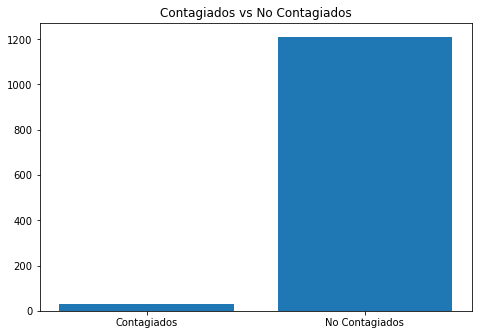

In [133]:
fig = pp.figure()
ax = fig.add_axes([1,1,1,1])
langs = ['Contagiados', 'No Contagiados']
cursos = [(len(contagiados)+(len(contagiados_pcr))),total_no_cotagiados]
mpt.title('Contagiados vs No Contagiados')
ax.bar(langs,cursos)
mpt.show()